<h2>Key Questions</h2>

<b>Question 1</b>: What was the best month for sale? How much was earned that month

<b>Question 2</b>: Which city had the highest sales

<b>Question 3</b>: What time should we display advertisements to maximize the likelihood of customers buying the product?

<b>Question 4</b>: What products are often bought together?

<b>Question 5</b>: What products are sold the most? Why do you think they are sold the most?


In [158]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

In [63]:
df = pd.read_csv('Sales_April_2019.csv')

In [64]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [65]:
path = 'Z:\DS\Practice\Sales analysis\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'

In [66]:
all_months_data = pd.DataFrame()

In [67]:
for file in os.listdir(path):
    if '.csv' in file:
        
        df = pd.read_csv(file)
        
        all_months_data = pd.concat([all_months_data, df])
        
        

In [68]:
all_months_data.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [69]:
#all_months_data.to_csv('all_months.csv', index=False)

In [70]:
all_data = pd.read_csv('all_months.csv') 

In [71]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Cleaning Data

1. Deleting null values

In [72]:
all_data.dropna(how='all', inplace=True)

In [73]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

2. Deleting rows with 'Or' 

In [74]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data = all_data[all_data['Month'] != 'Or' ]


In [75]:
all_data[all_data['Month'] == 'Or' ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


3. Convert columns to correct Datatype

In [76]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)

all_data['Price Each'] = all_data['Price Each'].astype(float)


Augmenting data with additional columns


Task 1: Adding month column

In [77]:
all_data['Month'] = all_data['Month'].astype(int)

In [78]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


In [79]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Task 2: Add a sales column

In [80]:
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Task 3: Add a city column


In [81]:
all_data[all_data['Purchase Address'].str.contains('Austin') ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
38,176591,Apple Airpods Headphones,1,150.00,04/21/19 07:21,"600 Maple St, Austin, TX 73301",4,150.00
56,176609,Apple Airpods Headphones,1,150.00,04/11/19 16:59,"267 11th St, Austin, TX 73301",4,150.00
122,176674,AAA Batteries (4-pack),3,2.99,04/20/19 20:53,"907 West St, Austin, TX 73301",4,8.97
125,176677,34in Ultrawide Monitor,1,379.99,04/01/19 11:50,"661 Washington St, Austin, TX 73301",4,379.99
135,176686,Wired Headphones,1,11.99,04/17/19 15:17,"892 10th St, Austin, TX 73301",4,11.99
...,...,...,...,...,...,...,...,...
186759,259275,Lightning Charging Cable,1,14.95,09/25/19 16:22,"273 7th St, Austin, TX 73301",9,14.95
186779,259294,27in FHD Monitor,1,149.99,09/16/19 11:02,"796 Walnut St, Austin, TX 73301",9,149.99
186786,259298,20in Monitor,1,109.99,09/18/19 09:10,"188 11th St, Austin, TX 73301",9,109.99
186830,259339,USB-C Charging Cable,2,11.95,09/12/19 23:43,"509 Park St, Austin, TX 73301",9,23.90


In [82]:
all_data['Purchase Address'].str.split(',').str[2].str[:3]

0          TX
2          MA
3          CA
4          CA
5          CA
         ... 
186845     CA
186846     CA
186847     CA
186848     CA
186849     CA
Name: Purchase Address, Length: 185950, dtype: object

In [83]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1] + ' (' + all_data['Purchase Address'].str.split(',').str[2].str[1:3] + ')' 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [84]:
all_data['City'].unique()

array([' Dallas (TX)', ' Boston (MA)', ' Los Angeles (CA)',
       ' San Francisco (CA)', ' Seattle (WA)', ' Atlanta (GA)',
       ' New York City (NY)', ' Portland (OR)', ' Austin (TX)',
       ' Portland (ME)'], dtype=object)

Question 1: What was the best month for sale? How much was earned that month

In [85]:

monthly_sales = all_data.groupby('Month')['Total Sales'].sum().reset_index()

In [86]:
monthly_sales

,Month,Total Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


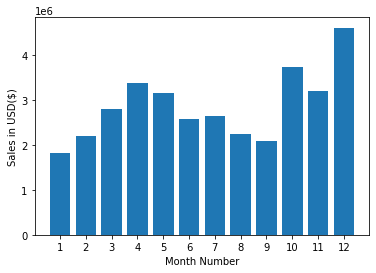

In [87]:
months = range(1,13)

plt.bar(months, monthly_sales['Total Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel("Sales in USD($)")

plt.show()

Question 2: Which city had the highest sales

In [88]:

city_sales = all_data.groupby('City')['Total Sales'].sum().reset_index()
city_sales

,City,Total Sales
0,Atlanta (GA),2795498.58
1,Austin (TX),1819581.75
2,Boston (MA),3661642.01
3,Dallas (TX),2767975.40
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
6,Portland (ME),449758.27
7,Portland (OR),1870732.34
8,San Francisco (CA),8262203.91
9,Seattle (WA),2747755.48


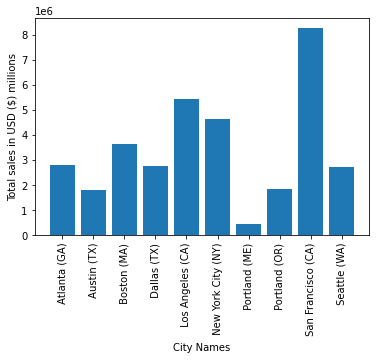

In [89]:

cities = city_sales['City'].unique()

plt.bar(cities, city_sales['Total Sales'])
plt.xticks(cities, rotation='vertical')
plt.xlabel("City Names")
plt.ylabel("Total sales in USD ($) millions")

plt.show()

Question 3: What time should we display advertisements to maximize the likelihood of customers buying the product?

In [90]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\DELLPC~1\AppData\Local\Temp/ipykernel_15528/3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [91]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [95]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


Total Sales per hour

In [121]:
hourly_sales = all_data.groupby('Hour')['Total Sales'].sum().reset_index()
hourly_sales 

,Hour,Total Sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
5,5,230679.82
6,6,448113.00
7,7,744854.12
8,8,1192348.97
9,9,1639030.58


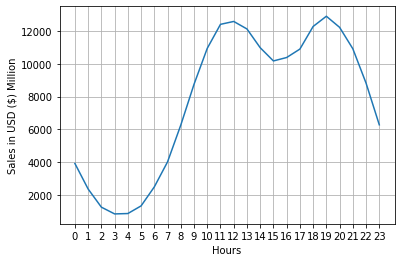

In [119]:
hours = hourly_sales['Hour']

plt.plot(hours, hourly_sales['Total Sales'] )
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel('Sales in USD ($) Million')
plt.grid()
plt.show()


Quantity Ordered per hour

In [122]:
hourly_orders = all_data.groupby('Hour')['Quantity Ordered'].count().reset_index()
hourly_orders

,Hour,Quantity Ordered
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


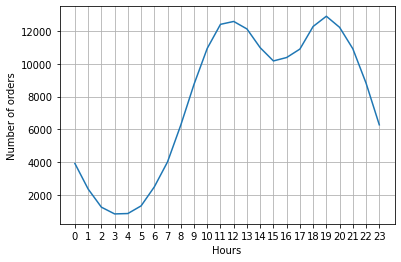

In [123]:
plt.plot(hours, hourly_orders['Quantity Ordered'])
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of orders")

plt.grid()
plt.show()


Question 4: What products are often bought together?

In [173]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [159]:
prac_df = all_data.groupby('Order ID')['Product'].apply(list).reset_index()
prac_df.head()

,Order ID,Product
0,141234,[iPhone]
1,141235,[Lightning Charging Cable]
2,141236,[Wired Headphones]
3,141237,[27in FHD Monitor]
4,141238,[Wired Headphones]


In [152]:
grouped_products =  prac_df.loc[prac_df['Product'].apply(lambda x: len(x) > 1), 'Product']

In [153]:
grouped_products

41                 [USB-C Charging Cable, Wired Headphones]
56        [Apple Airpods Headphones, AA Batteries (4-pack)]
131                     [Vareebadd Phone, Wired Headphones]
150                    [Google Phone, USB-C Charging Cable]
216              [Google Phone, Bose SoundSport Headphones]
                                ...                        
178302               [Macbook Pro Laptop, Wired Headphones]
178322                     [Google Phone, Wired Headphones]
178350                           [iPhone, Wired Headphones]
178362                   [iPhone, Lightning Charging Cable]
178397    [34in Ultrawide Monitor, Lightning Charging Ca...
Name: Product, Length: 7136, dtype: object

In [172]:
prod_comb = Counter()

for product in  prac_df['Product']:
    
    comb = combinations(sorted(product), 2)
    prod_comb.update(comb)
    
top20_prod = prod_comb.most_common(20)
top20_prod

top20_prod = pd.DataFrame(top20_prod, columns=['Products','Count'])

top20_prod.head()



,Products,Count
0,"(Lightning Charging Cable, iPhone)",1015
1,"(Google Phone, USB-C Charging Cable)",999
2,"(Wired Headphones, iPhone)",462
3,"(Google Phone, Wired Headphones)",423
4,"(Apple Airpods Headphones, iPhone)",373


Question 5: What products are sold the most? Why do you think they are sold the most?

In [174]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [184]:

prod_quantity = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
prod_quantity


,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


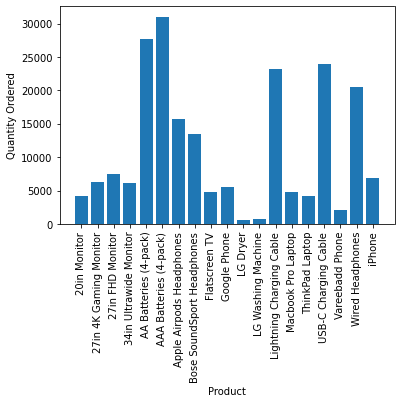

In [187]:
prod = prod_quantity['Product'].unique()

plt.bar(prod, prod_quantity['Quantity Ordered'])
plt.xticks(prod, rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')


plt.show()

In [193]:

prod_price = all_data.groupby('Product')['Price Each'].mean().reset_index()
prod_price


,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


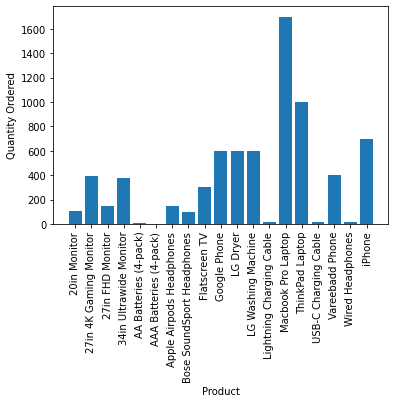

In [194]:
prod = prod_quantity['Product'].unique()

plt.bar(prod, prod_price['Price Each'])
plt.xticks(prod, rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')


plt.show()

Understanding the corelation between the Quantity ordered and Price of the products.

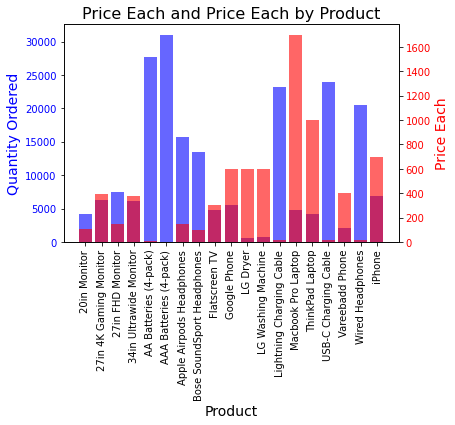

In [199]:
fig, ax1 = plt.subplots()

# Bar plot for Sales
ax1.bar(prod, prod_quantity['Quantity Ordered'], color='blue', alpha=0.6, label='Quantity Ordered')
ax1.set_xlabel('Product', fontsize=14)
ax1.set_ylabel('Quantity Ordered', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

plt.xticks(prod, rotation='vertical')
# Create a secondary y-axis for Leads
ax2 = ax1.twinx()
ax2.bar(prod, prod_price['Price Each'], color='red', alpha=0.6, label='Price Each')
ax2.set_ylabel('Price Each', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')

# Set the title
plt.title('Price Each and Price Each by Product', fontsize=16)

# Show the plot
plt.show()